In [1]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
summary_ha = pd.read_csv('/home/kevin/Documents/M8/N-A-L656/new_coord_maps/summary.csv')
summary_sii = pd.read_csv('/home/kevin/Documents/M8/N-A-L671/new_coord_maps/summary.csv')

In [3]:
summary_ha['filter'] = 'N-A-L656'
summary_sii['filter'] = 'N-A-L671'

In [39]:
import os
summary_ha['image']=[os.path.splitext(os.path.basename(p))[0] for p in summary_ha.transpath]
summary_sii['image']=[os.path.splitext(os.path.basename(p))[0] for p in summary_sii.transpath]

<Axes: xlabel='detector', ylabel='final_rmse'>

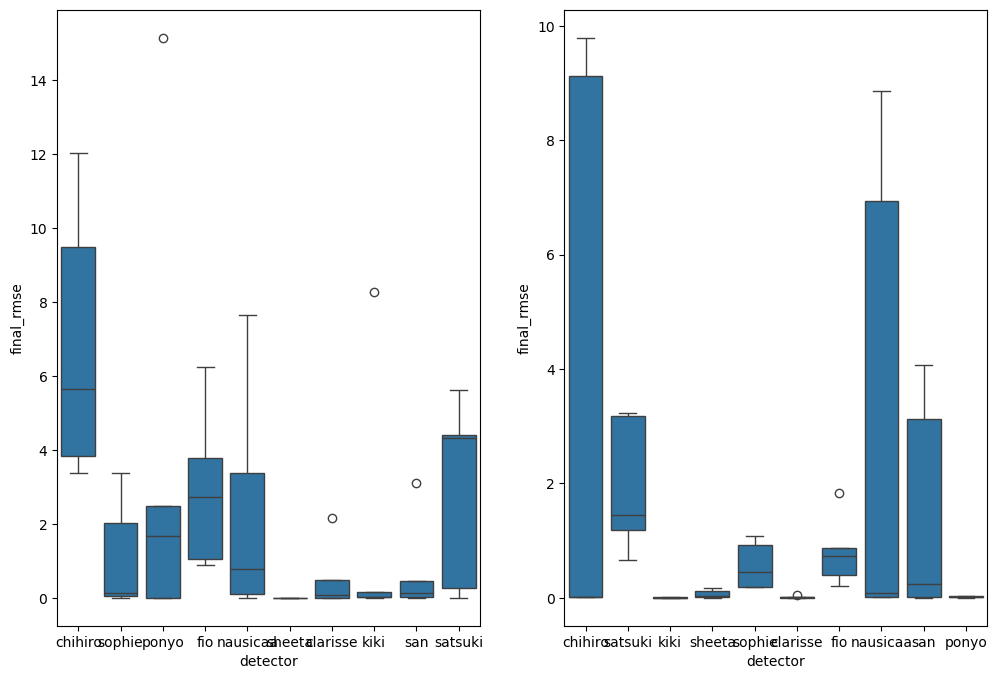

In [4]:
fig, axs = plt.subplots(figsize=(12,8), ncols=2)
sb.boxplot(ax=axs[0],data=summary_ha, x='detector',y='final_rmse')
sb.boxplot(ax=axs[1],data=summary_sii, x='detector',y='final_rmse')

In [5]:
summary_comb = pd.concat([summary_ha, summary_sii])

<Axes: xlabel='detector', ylabel='final_rmse'>

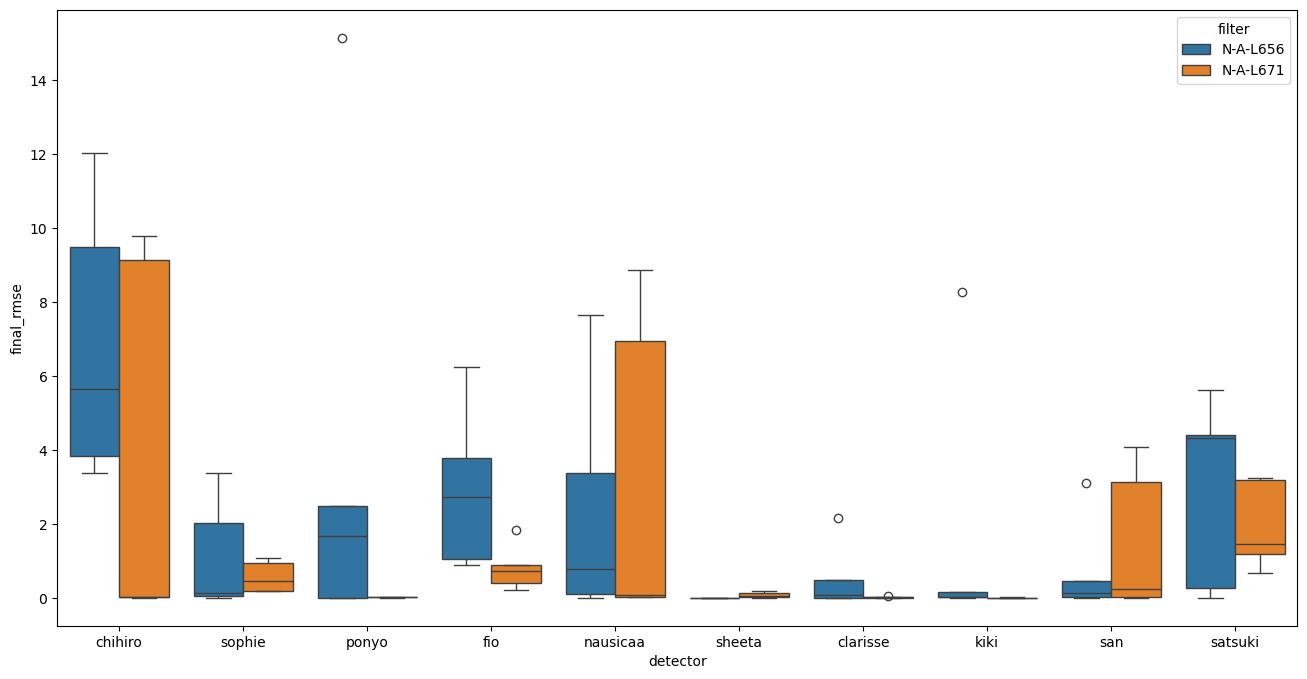

In [6]:
fig, ax = plt.subplots(figsize=(16,8), ncols=1)
sb.boxplot(ax=ax,data=summary_comb, x='detector',y='final_rmse', hue='filter')


In [7]:
summary_comb.groupby(['detector','filter']).min()[['image_objects','final_rmse']]


image_objects  final_rmse
detector filter                             
chihiro  N-A-L656             71    3.385104
         N-A-L671            186    0.004128
clarisse N-A-L656             58    0.000798
         N-A-L671            177    0.002129
fio      N-A-L656             40    0.895653
         N-A-L671            111    0.201838
kiki     N-A-L656             51    0.004254
         N-A-L671            161    0.000197
nausicaa N-A-L656             84    0.004109
         N-A-L671            169    0.009144
ponyo    N-A-L656             50    0.002425
         N-A-L671            145    0.001198
san      N-A-L656             39    0.002158
         N-A-L671            124    0.002232
satsuki  N-A-L656             41    0.004847
         N-A-L671            118    0.666792
sheeta   N-A-L656             55    0.000858
         N-A-L671            116    0.000862
sophie   N-A-L656             91    0.001271
         N-A-L671            134    0.181681

<Axes: xlabel='detector', ylabel='image_objects'>

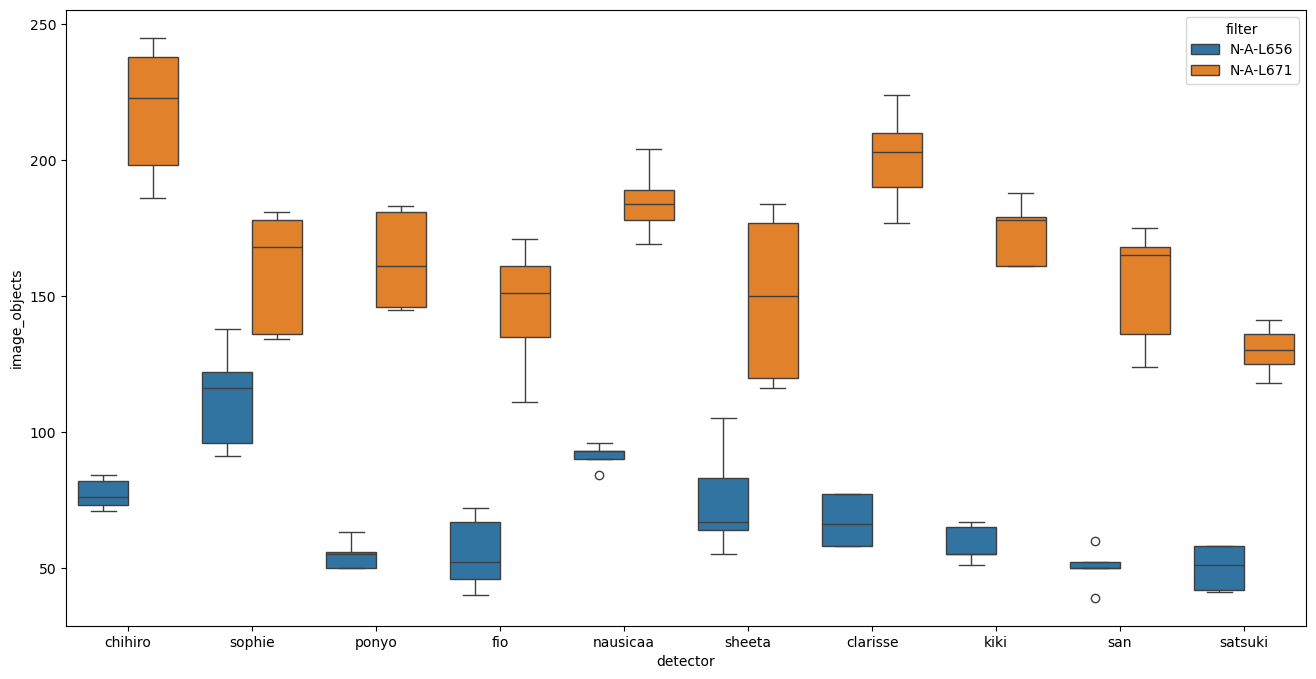

In [8]:
fig, ax = plt.subplots(figsize=(16,8), ncols=1)
sb.boxplot(ax=ax,data=summary_comb, x='detector',y='image_objects', hue='filter')

In [13]:
summary_ha.query('transpath.str.endswith(\'01.db\')')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter
34,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,kiki,55,1739,5,24.263616,0.155729,3,N-A-L656


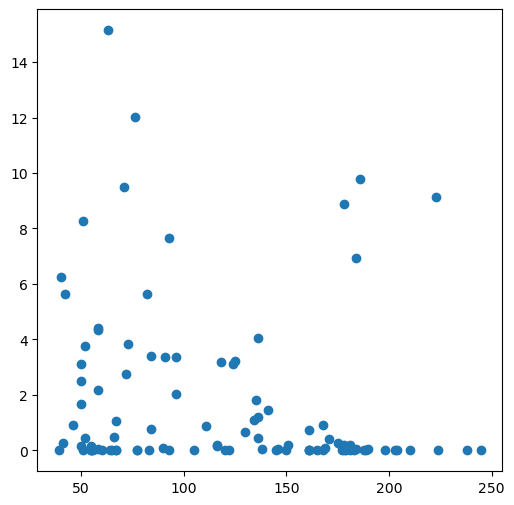

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(summary_comb.image_objects, summary_comb.final_rmse)

In [16]:
summary_ha.query('final_rmse>6')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter
0,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,71,2237,3,19.926957,9.482436,3,N-A-L656
6,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,nausicaa,93,1830,4,16.367494,7.639714,3,N-A-L656
13,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,fio,40,1842,4,16.926880,6.247986,3,N-A-L656
19,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,ponyo,63,1742,1,15.145700,15.145700,3,N-A-L656
31,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,76,2454,3,16.379444,12.035684,3,N-A-L656
46,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,kiki,51,1704,2,18.007276,8.278408,3,N-A-L656


In [18]:
summary_ha.query('final_rmse>6').transpath.to_list()

['/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564836.db',
 '/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564830.db',
 '/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564812.db',
 '/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564838.db',
 '/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564816.db',
 '/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564811.db']

In [19]:
summary_ha.query('transpath.str.endswith(\'07.db\')')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter
23,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,66,2053,3,15.288298,0.482541,3,N-A-L656


In [40]:
summary_ha.query('detector==\'clarisse\'')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter,image
8,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,77,2140,8,16.901156,0.001402,3,N-A-L656,SUPA01564817
18,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,58,2076,3,18.044291,2.157844,3,N-A-L656,SUPA01564847
23,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,66,2053,3,15.288298,0.482541,3,N-A-L656,SUPA01564807
30,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,58,1992,4,14.450643,0.064221,3,N-A-L656,SUPA01564837
39,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,clarisse,77,2062,7,14.611580,0.000798,3,N-A-L656,SUPA01564827


In [22]:
summary_ha.iloc[39].transpath

'/home/kevin/Documents/M8/N-A-L656/new_coord_maps/SUPA01564827.db'

In [34]:
for d,g in summary_ha.groupby('detector'):
    minindex = g.final_rmse.argmin()
    m = g.iloc[minindex]
    print(f'Detector: {d}, image_objects: {m.image_objects},final_rmse: {m.final_rmse}, niter: {m.niter}')


Detector: chihiro, image_objects: 84,final_rmse: 3.3851036568691364, niter: 4
Detector: clarisse, image_objects: 77,final_rmse: 0.0007983639521109, niter: 7
Detector: fio, image_objects: 46,final_rmse: 0.8956527414168503, niter: 5
Detector: kiki, image_objects: 67,final_rmse: 0.0042535800215815, niter: 7
Detector: nausicaa, image_objects: 93,final_rmse: 0.0041086898681101, niter: 8
Detector: ponyo, image_objects: 55,final_rmse: 0.0024246858739564, niter: 8
Detector: san, image_objects: 60,final_rmse: 0.0021583252054029, niter: 6
Detector: satsuki, image_objects: 51,final_rmse: 0.0048469211083721, niter: 9
Detector: sheeta, image_objects: 67,final_rmse: 0.0008580469652768, niter: 10
Detector: sophie, image_objects: 122,final_rmse: 0.0012706575725451, niter: 8


In [31]:
summary_ha.groupby('detector').min()

,transpath,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter
detector,,,,,,,,
chihiro,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,71,2237,3,15.275821,3.385104,3,N-A-L656
clarisse,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,58,1992,3,14.450643,0.000798,3,N-A-L656
fio,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,40,1810,2,15.377408,0.895653,3,N-A-L656
kiki,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,51,1638,2,18.007276,0.004254,3,N-A-L656
nausicaa,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,84,1525,3,16.367494,0.004109,3,N-A-L656
ponyo,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,50,1497,1,15.145700,0.002425,3,N-A-L656
san,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,39,1887,3,14.894277,0.002158,3,N-A-L656
satsuki,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,41,1393,2,11.183186,0.004847,3,N-A-L656
sheeta,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,55,961,6,17.946882,0.000858,3,N-A-L656


In [41]:
summary_ha.query('detector==\'chihiro\'')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter,image
0,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,71,2237,3,19.926957,9.482436,3,N-A-L656,SUPA01564836
1,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,73,2344,4,20.799222,3.832585,3,N-A-L656,SUPA01564826
15,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,84,2354,4,15.275821,3.385104,3,N-A-L656,SUPA01564846
31,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,76,2454,3,16.379444,12.035684,3,N-A-L656,SUPA01564816
42,/home/kevin/Documents/M8/N-A-L656/new_coord_ma...,chihiro,82,2367,3,19.017839,5.639558,3,N-A-L656,SUPA01564806


In [42]:
summary_sii.query('detector==\'chihiro\'')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,poly_degree,filter,image
0,/home/kevin/Documents/M8/N-A-L671/new_coord_ma...,chihiro,245,2354,10,19.020724,0.020585,3,N-A-L671,SUPA01566826
12,/home/kevin/Documents/M8/N-A-L671/new_coord_ma...,chihiro,198,2237,10,23.001089,0.009665,3,N-A-L671,SUPA01566816
31,/home/kevin/Documents/M8/N-A-L671/new_coord_ma...,chihiro,186,2344,4,20.338159,9.793613,3,N-A-L671,SUPA01566806
45,/home/kevin/Documents/M8/N-A-L671/new_coord_ma...,chihiro,223,2454,4,16.839588,9.128186,3,N-A-L671,SUPA01566796
48,/home/kevin/Documents/M8/N-A-L671/new_coord_ma...,chihiro,238,2368,10,19.254122,0.004128,3,N-A-L671,SUPA01566786
